In [1]:
from helper import load_trip_data

trips_that_didnt_go_anywhere, trips_that_went_somewhere, other_errors = load_trip_data()

In [2]:
# Top 10 rows from trips_that_didnt_go_anywhere DataFrame
print("Top 10 trips_that_didnt_go_anywhere:")
display(trips_that_didnt_go_anywhere.head(10))

# Top 10 elements from trips_that_went_somewhere (list of tuples)
print("Top 10 trips_that_went_somewhere:")
for i, item in enumerate(trips_that_went_somewhere[:10]):
    print(f"{i+1}: {item}")

# Top 10 elements from other_errors (list of tuples)
print("Top 10 other_errors:")
for i, item in enumerate(other_errors[:10]):
    print(f"{i+1}: {item}")

Top 10 trips_that_didnt_go_anywhere:


bike_id                 from_station  from_station_lat  from_station_lng  \
0   612804  Branickiego - Ledóchowskiej         52.155439         21.073689   
1   613206             Rondo Wiatraczna         52.244564         21.083806   
2   613345       Szaserów – Garwolińska         52.249684         21.092105   
3   613487            Żelazna - Chłodna         52.237314         20.988849   
4   612403             Plac Na Rozdrożu         52.219962         21.025830   
5   613247   Czerniakowska- Szwoleżerów         52.215851         21.046341   
6   612648    Stryjeńskich - Belgradzka         52.137604         21.050553   
7   612934      Park Kultury w Powsinie         52.116250         21.087655   
8   613429           Książęca - Rozbrat         52.230087         21.030236   
9   612885               Metro Stokłosy         52.156867         21.033840   

                    to_station  to_station_lat  to_station_lng  \
0  Branickiego - Ledóchowskiej       52.155439       21.073689   
1             Rondo Wiatraczna       52.244564       21.083806   
2       Szaserów – Garwolińska       52.249684       21.092105   
3            Żelazna - Chłodna       52.237314       20.988849   
4             Plac Na Rozdrożu       52.219962       21.025830   
5   Czerniakowska- Szwoleżerów       52.215851       21.046341   
6    Stryjeńskich - Belgradzka       52.137604       21.050553   
7      Park Kultury w Powsinie       52.116250       21.087655   
8           Książęca - Rozbrat       52.230087       21.030236   
9               Metro Stokłosy       52.156867       21.033840   

        departure_time         arrival_time  
0  2025-04-02 19:44:13  2025-04-02 19:46:16  
1  2025-04-02 19:44:13  2025-04-02 19:46:16  
2  2025-04-02 19:44:13  2025-04-02 19:46:16  
3  2025-04-02 19:45:14  2025-04-02 19:47:18  
4  2025-04-02 19:44:13  2025-04-02 19:47:18  
5  2025-04-02 19:47:18  2025-04-02 19:49:21  
6  2025-04-02 19:47:18  2025-04-02 19:49:21  
7  2025-04-02 19:48:20  2025-04-02 19:50:23  
8  2025-04-02 19:48:20  2025-04-02 19:50:23  
9  2025-04-02 19:46:16  2025-04-02 19:50:23

Top 10 trips_that_went_somewhere:
1: (bike_id                                        613703
from_station                    Emilii Plater - Złota
from_station_lat                            52.230978
from_station_lng                            21.003676
to_station          Marszałkowska - Al. Jerozolimskie
to_station_lat                              52.229286
to_station_lng                              21.011579
departure_time                    2025-04-02 19:44:13
arrival_time                      2025-04-02 19:45:14
Name: 0, dtype: object, {'duration': 644, 'legs': [{'mode': 'WALK', 'startTime': 1743615853000, 'endTime': 1743616497000, 'from': {'lat': 52.230978, 'lon': 21.003676, 'name': 'Origin'}, 'to': {'lat': 52.229286, 'lon': 21.011579, 'name': 'Destination'}}]})
2: (bike_id                                     610584
from_station        Darwina - Nusbauma-Hilarowicza
from_station_lat                          52.26421
from_station_lng                          21.02618
to_station  

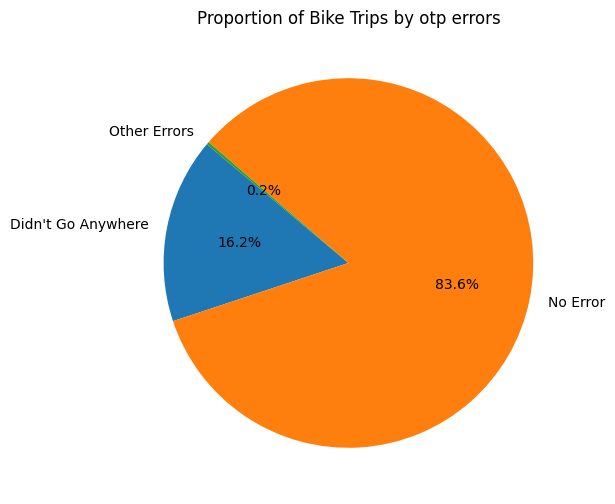

In [3]:
from io import BytesIO

import matplotlib.pyplot as plt

# Calculate the counts for each trip type
counts = [
    len(trips_that_didnt_go_anywhere),
    len(trips_that_went_somewhere),
    len(other_errors)
]
labels = [
    'Didn\'t Go Anywhere',
    'No Error',
    'Other Errors'
]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bike Trips by otp errors')
# Save the plot to the plots dictionary
if 'plots' not in globals():
    plots = {}

# plt.savefig(r"plots/trip_types_pie_chart.png", format='png')

plt.show()

In [4]:
import pandas as pd

# Extract trip info and error from other_errors
trip_infos = [trip for trip, err in other_errors]

# Convert to DataFrame if not already
if not isinstance(trip_infos[0], pd.Series):
    trip_df = pd.DataFrame(trip_infos)
else:
    trip_df = pd.DataFrame(trip_infos)

# Ensure datetime columns are parsed
trip_df['departure_time'] = pd.to_datetime(trip_df['departure_time'])
trip_df['arrival_time'] = pd.to_datetime(trip_df['arrival_time'])

# Define night as between 22:00 and 6:00
def is_night(dt):
    return (dt.dt.hour >= 22) | (dt.dt.hour < 6)

# Calculate trip duration in minutes
trip_df['duration_min'] = (trip_df['arrival_time'] - trip_df['departure_time']).dt.total_seconds() / 60

# Check for night trips or very long trips (e.g., > 120 min)
night_mask = is_night(trip_df['departure_time'])
long_mask = trip_df['duration_min'] > 120

# Summarize
all_night_or_long = (night_mask | long_mask).all()
print(f"All 'other_errors' trips were conducted by night or were very long: {all_night_or_long}")

# Optionally, show counts
print(f"Trips at night: {night_mask.sum()}")
print(f"Very long trips (>120 min): {long_mask.sum()}")
print(f"Total trips: {len(trip_df)}")
# Print a few trips that are neither long nor at night
not_long_nor_night = trip_df[~long_mask & ~night_mask]
print("Sample trips that are not long and not at night:")
# Enforce latitude and longitude range for Warsaw area (lat ~52, lng ~21)
filtered = not_long_nor_night[
    (not_long_nor_night['from_station_lat'].between(51.9, 52.4)) &
    (not_long_nor_night['from_station_lng'].between(20.8, 21.3)) &
    (not_long_nor_night['to_station_lat'].between(51.9, 52.4)) &
    (not_long_nor_night['to_station_lng'].between(20.8, 21.3))
]
display(filtered)

All 'other_errors' trips were conducted by night or were very long: False
Trips at night: 69
Very long trips (>120 min): 369
Total trips: 446
Sample trips that are not long and not at night:


bike_id                       from_station  from_station_lat  \
8027     613951                          Gościniec         52.222881   
8031     612852                          Gościniec         52.222881   
8033     611421                          Gościniec         52.222881   
8034     613075                          Gościniec         52.222881   
11789    612872                Puławska - Kajakowa         52.129592   
11792    611892                Puławska - Kajakowa         52.129592   
11794    610901                Puławska - Kajakowa         52.129592   
11795    612904                Puławska - Kajakowa         52.129592   
17451    613089             al. Reymonta - Conrada         52.270941   
34891    612824                       Warsaw Spire         52.232538   
37087    611048       Broniewskiego - Krasińskiego         52.264398   
42721    612138       Broniewskiego - Perzyńskiego         52.270634   
63630    610399                      Metro Młociny         52.290974   
85575    612597                      Orlich Gniazd         52.248845   
127975   612337                      Metro Natolin         52.140391   
132363   612951      al. Lotników - Modzelewskiego         52.174435   
170827   610508                          Bysławska         52.159742   
170828   612120                          Bysławska         52.159742   
170829   611502                          Bysławska         52.159742   
170830   613183                          Bysławska         52.159742   
170831   613089                          Bysławska         52.159742   
170832   611950                          Bysławska         52.159742   
170833   610929                          Bysławska         52.159742   
170835   612320                          Bysławska         52.159742   
181450   611452                    Pętla Bokserska         52.170182   
181550   610046  Powstańców Śląskich - Człuchowska         52.228680   

        from_station_lng                    to_station  to_station_lat  \
8027           21.223207     Dereniowa - Płaskowickiej       52.142735   
8031           21.223207     Dereniowa - Płaskowickiej       52.142735   
8033           21.223207     Dereniowa - Płaskowickiej       52.142735   
8034           21.223207     Dereniowa - Płaskowickiej       52.142735   
11789          21.018367            Pętla Stare Bemowo       52.258245   
11792          21.018367            Pętla Stare Bemowo       52.258245   
11794          21.018367            Pętla Stare Bemowo       52.258245   
11795          21.018367            Pętla Stare Bemowo       52.258245   
17451          20.932627                     Bysławska       52.159742   
34891          20.983233                     Bysławska       52.159742   
37087          20.972318                     Bysławska       52.159742   
42721          20.950477               PKP Międzylesie       52.205017   
63630          20.929556       Stryjeńskich - Wąwozowa       52.131433   
85575          20.920259       Puławska – Karmazynowa        52.111877   
127975         21.056819  Broniewskiego - Perzyńskiego       52.270634   
132363         21.012881                    PKP Wesoła       52.253523   
170827         21.205322          Raszyńska - Wawelska       52.216641   
170828         21.205322          Raszyńska - Wawelska       52.216641   
170829         21.205322          Raszyńska - Wawelska       52.216641   
170830         21.205322          Raszyńska - Wawelska       52.216641   
170831         21.205322          Raszyńska - Wawelska       52.216641   
170832         21.205322          Raszyńska - Wawelska       52.216641   
170833         21.205322          Raszyńska - Wawelska       52.216641   
170835         21.205322          Raszyńska - Wawelska       52.216641   
181450         20.995840     Skarbka z Gór - Berensona       52.324196   
181550         20.915090                  Metro Kabaty       52.131093   

        to_station_lng      departure_time        arrival_time  

In [5]:
trips_that_went_somewhere

[(bike_id                                        613703
  from_station                    Emilii Plater - Złota
  from_station_lat                            52.230978
  from_station_lng                            21.003676
  to_station          Marszałkowska - Al. Jerozolimskie
  to_station_lat                              52.229286
  to_station_lng                              21.011579
  departure_time                    2025-04-02 19:44:13
  arrival_time                      2025-04-02 19:45:14
  Name: 0, dtype: object,
  {'duration': 644,
   'legs': [{'mode': 'WALK',
     'startTime': 1743615853000,
     'endTime': 1743616497000,
     'from': {'lat': 52.230978, 'lon': 21.003676, 'name': 'Origin'},
     'to': {'lat': 52.229286, 'lon': 21.011579, 'name': 'Destination'}}]}),
 (bike_id                                     610584
  from_station        Darwina - Nusbauma-Hilarowicza
  from_station_lat                          52.26421
  from_station_lng                          21.02618


In [ ]:
# # Check how often the bike was faster using trips_that_went_somewhere

# # Each element in trips_that_went_somewhere is a tuple: (trip_info, otp_result)
# # Assume otp_result is a dict with a 'duration_min' key for OTP duration

# bike_faster_count = 0
# total_count = 0

# from tqdm.notebook import tqdm

# for trip_info, otp_result in tqdm(trips_that_went_somewhere, desc="Comparing durations"):
#     # Skip if OTP result is missing or doesn't have duration
#     # if not isinstance(otp_result, dict) or 'duration_min' not in otp_result:
#     #     continue
#     # Convert to datetime if needed
#     from datetime import datetime
#     arrival_time = pd.to_datetime(trip_info['arrival_time'])
#     departure_time = pd.to_datetime(trip_info['departure_time'])
#     # Get durations
#     bike_duration = (arrival_time - departure_time).total_seconds()
#     otp_duration = otp_result['duration']
#     if bike_duration < otp_duration:
#         bike_faster_count += 1
#     total_count += 1
# print(f"Bike was faster in {bike_faster_count} out of {total_count} trips ({(bike_faster_count/len(trips_that_went_somewhere)*100):.1f}%)")

Comparing durations:   0%|          | 0/161281 [00:00<?, ?it/s]

Bike was faster in 135506 out of 161281 trips (84.0%)


In [7]:
# Check how often the bike was faster using trips_that_went_somewhere

# Each element in trips_that_went_somewhere is a tuple: (trip_info, otp_result)
# Assume otp_result is a dict with a 'duration_min' key for OTP duration

from collections import defaultdict

# Use dictionaries to count per (lat, lng) station
bike_faster_count_per_station = defaultdict(int)
total_count_per_station = defaultdict(int)

from tqdm.notebook import tqdm

for trip_info, otp_result in tqdm(trips_that_went_somewhere, desc="Comparing durations"):
    # Convert to datetime if needed
    arrival_time = pd.to_datetime(trip_info['arrival_time'])
    departure_time = pd.to_datetime(trip_info['departure_time'])
    # Get durations
    bike_duration = (arrival_time - departure_time).total_seconds()
    otp_duration = otp_result['duration']
    # Use (lat, lng) tuple as key
    key = (trip_info['from_station_lat'], trip_info['from_station_lng'])
    if bike_duration < otp_duration:
        bike_faster_count_per_station[key] += 1
    total_count_per_station[key] += 1

print("Per-station counts calculated.")

Comparing durations:   0%|          | 0/161281 [00:00<?, ?it/s]

Per-station counts calculated.


In [8]:
station_faster_percentage = {}
for each_station, count in bike_faster_count_per_station.items():
    total = total_count_per_station[each_station]
    station_faster_percentage[each_station] = (count / total) * 100
    print(f"Station {each_station}: Bike was faster in {count} out of {total} trips ({(count/total*100):.1f}%)")

Station (52.230978, 21.003676): Bike was faster in 729 out of 857 trips (85.1%)
Station (52.26421, 21.02618): Bike was faster in 204 out of 269 trips (75.8%)
Station (52.239541, 20.942309): Bike was faster in 520 out of 620 trips (83.9%)
Station (52.276157, 20.961667): Bike was faster in 517 out of 596 trips (86.7%)
Station (52.198639, 20.965252): Bike was faster in 547 out of 678 trips (80.7%)
Station (52.257631, 20.91931): Bike was faster in 265 out of 315 trips (84.1%)
Station (52.234745, 21.053651): Bike was faster in 466 out of 590 trips (79.0%)
Station (52.273679, 21.043095): Bike was faster in 207 out of 266 trips (77.8%)
Station (52.260904, 21.072881): Bike was faster in 179 out of 190 trips (94.2%)
Station (52.247017, 20.989516): Bike was faster in 366 out of 416 trips (88.0%)
Station (52.213238, 21.021057): Bike was faster in 849 out of 960 trips (88.4%)
Station (52.162258, 21.028076): Bike was faster in 710 out of 818 trips (86.8%)
Station (52.239503, 20.913805): Bike was fa

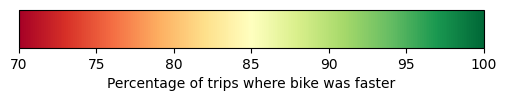

In [ ]:
import numpy as np

# Normalize percentages for colormap (min ~70%, max 100%)
min_percent = 70
max_percent = 100

def percentage_to_color(percentage):
    # Normalize to 0-1
    norm = (percentage - min_percent) / (max_percent - min_percent)
    norm = np.clip(norm, 0, 1)
    # Use matplotlib colormap (e.g., 'viridis')
    import matplotlib.pyplot as plt
    cmap = plt.get_cmap('RdYlGn')
    return cmap(norm)

# Example: create a dict mapping station to color
station_colors = {station: percentage_to_color(percent) for station, percent in station_faster_percentage.items()}

# Generate a colorbar legend for the percentage-to-color mapping
def plot_percentage_colorbar(min_percent=70, max_percent=100, cmap_name='RdYlGn'):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(vmin=min_percent, vmax=max_percent)
    cb1 = plt.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=ax, orientation='horizontal'
    )
    cb1.set_label('Percentage of trips where bike was faster')
    plt.show()


In [14]:
from helper import get_warsaw_stations_coords
no_outlier_stations_coords = get_warsaw_stations_coords('e')

Is there problem with mapping: True


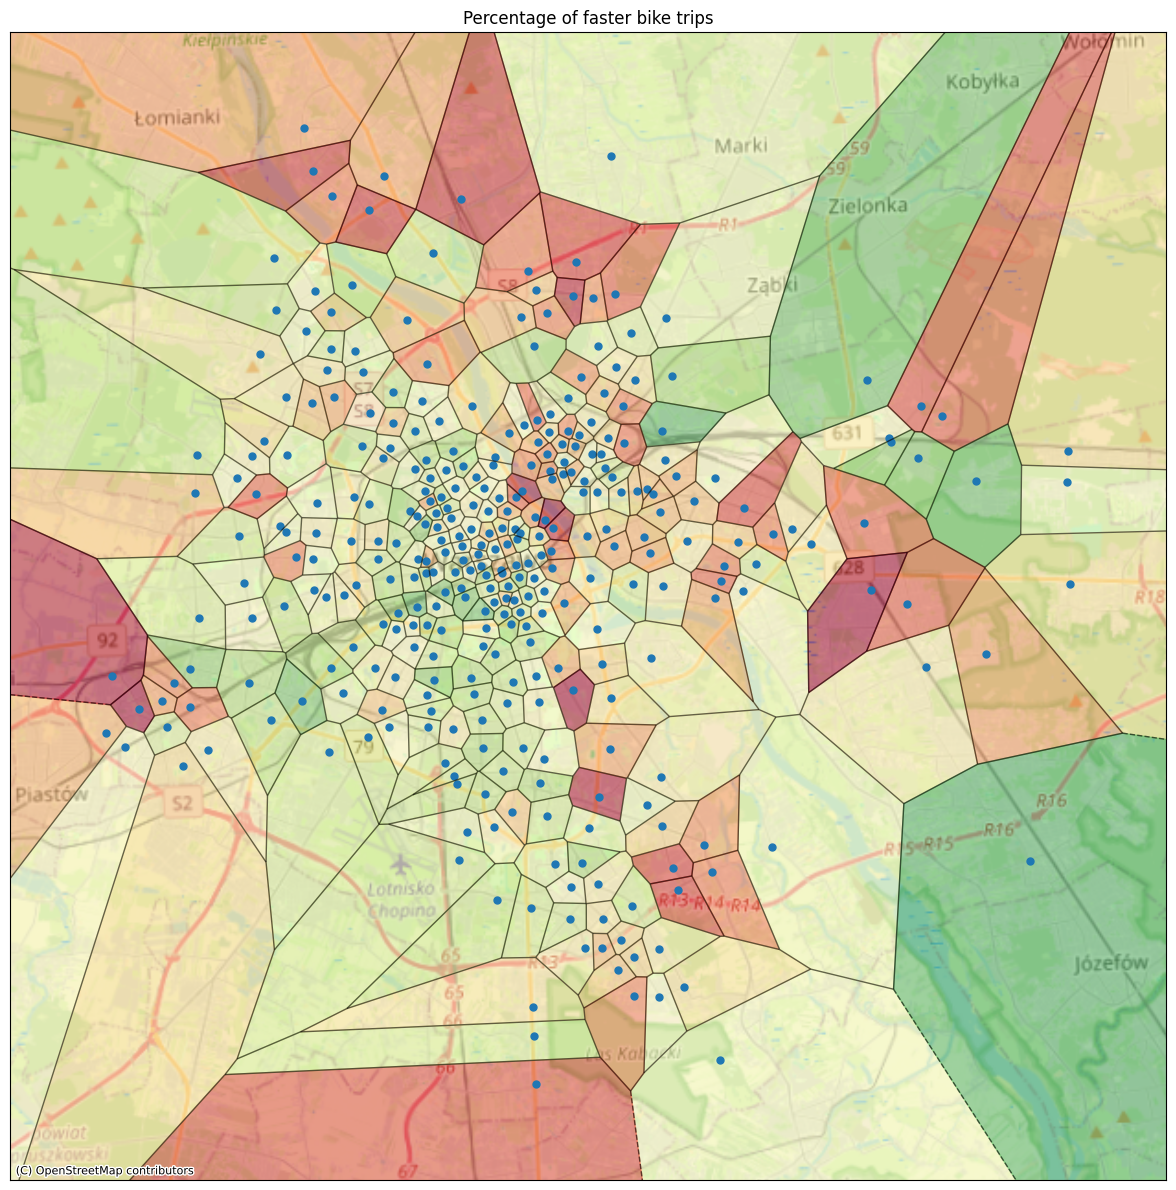

In [23]:
import voronoi_drawer as vd
from importlib import reload
reload(vd)
vd.draw_voronoi_heatmap_on_warsaw(no_outlier_stations_coords,station_colors, name = "Percentage of faster bike trips", save=True,station_legend=None,zoom = 1,alpha = 0.5)

In [26]:
from helper import create_station_location_mapping
warsaw_bike_movements = pd.read_csv('..\\bike_movements_warsaw.csv')
location_to_station, station_to_location = create_station_location_mapping(warsaw_bike_movements)

In [28]:
# Get the 10 stations with the lowest (worst) bike faster percentage
worst_stations = sorted(station_faster_percentage.items(), key=lambda x: x[1])[:30]

print("Top 10 stations with worst bike faster ratio:")
for idx, (station, percent) in enumerate(worst_stations, 1):
    print(f"{idx}. Station {location_to_station[station]}: {percent:.2f}%")

Top 10 stations with worst bike faster ratio:
1. Station PKP Wawer: 65.15%
2. Station EkoPark - Warszawska: 66.35%
3. Station Centrum Nauki Kopernik: 66.88%
4. Station Sobieskiego - Chełmska: 70.28%
5. Station PKP Gołąbki : 70.45%
6. Station Św. Bonifacego - al. gen. W. Sikorskiego: 70.84%
7. Station Bulwar - most Śląsko - Dąbrowski: 71.19%
8. Station Kondratowicza - Chodecka: 71.48%
9. Station Metro Centrum Nauki Kopernik: 71.86%
10. Station Marywilska - P&R Żerań: 72.50%
11. Station Myśliborska - al. Kuklińskiego: 72.56%
12. Station Światowida - Mehoffera: 72.73%
13. Station al. Rzeczypospolitej - Klimczaka: 73.15%
14. Station Pętla Bródno - Podgrodzie: 73.24%
15. Station Branickiego - Ledóchowskiej: 73.36%
16. Station Plac Szembeka: 73.81%
17. Station Puławska – Karmazynowa : 73.85%
18. Station Rondo Fieldorfa: 74.32%
19. Station Czerwonych Beretów - Frontowa: 75.00%
20. Station OSiR Wawer: 75.00%
21. Station Kondratowicza - Przy Grodzisku: 75.13%
22. Station Mariensztat: 75.24%
23.

In [38]:
from collections import defaultdict

# Use dictionaries to count per (lat, lng) station
bike_legs_departures_count_per_station = defaultdict(int)
number_of_departures_count_per_station = defaultdict(int)

bike_legs_arrivals_count_per_station = defaultdict(int)
number_of_arrivals_count_per_station = defaultdict(int)

from tqdm.notebook import tqdm

for trip_info, otp_result in tqdm(trips_that_went_somewhere, desc="Comparing durations"):

    number_of_departures_count_per_station[(trip_info['from_station_lat'], trip_info['from_station_lng'])] += 1
    number_of_arrivals_count_per_station[(trip_info['to_station_lat'], trip_info['to_station_lng'])] += 1

    bike_legs_departures_count_per_station[(trip_info['from_station_lat'], trip_info['from_station_lng'])] += len(otp_result['legs'])
    bike_legs_arrivals_count_per_station[(trip_info['to_station_lat'], trip_info['to_station_lng'])] += len(otp_result['legs'])
    

print("Per-station counts calculated.")

Comparing durations:   0%|          | 0/161281 [00:00<?, ?it/s]

Per-station counts calculated.


In [58]:
# Find trips that went somewhere and were over 30 minutes long
long_trips = []
for trip_info, otp_result in trips_that_went_somewhere:
    # Calculate bike trip duration in minutes
    departure_time = pd.to_datetime(trip_info['departure_time'])
    arrival_time = pd.to_datetime(trip_info['arrival_time'])
    duration_min = (arrival_time - departure_time).total_seconds() / 60
    if duration_min > 30:
        long_trips.append((trip_info, otp_result))

print(f"Number of trips that went somewhere and were over 30 minutes long: {len(long_trips)}")
# Optionally, show a few examples
for i, (trip_info, _) in enumerate(long_trips[:5]):
    print(f"{i+1}. From {trip_info['from_station']} to {trip_info['to_station']}, duration: {duration_min:.1f} min")

Number of trips that went somewhere and were over 30 minutes long: 37889
1. From Rondo Wiatraczna to Plac Hallera - Dąbrowszczaków, duration: 40.0 min
2. From Plac Powstańców Warszawy to Przasnyska - Rydygiera, duration: 40.0 min
3. From Sobieskiego - Chełmska to Czerniakowska - Gagarina, duration: 40.0 min
4. From Metro Dworzec Gdański to Radzymińska - Łodygowa, duration: 40.0 min
5. From Plac Powstańców Warszawy to Krucza - Wspólna, duration: 40.0 min


In [72]:
long_trips[9][1]

{'duration': 3192,
 'legs': [{'mode': 'WALK',
   'startTime': 1743616716000,
   'endTime': 1743619908000,
   'from': {'lat': 52.234745, 'lon': 21.053651, 'name': 'Origin'},
   'to': {'lat': 52.238549, 'lon': 21.006889, 'name': 'Destination'}}]}

Average leg count for trips that went somewhere: 1.00


In [39]:
station_departure_average_legs = {}
for each_station, count in bike_legs_departures_count_per_station.items():
    total = number_of_departures_count_per_station[each_station]
    station_departure_average_legs[each_station] = count / total if total > 0 else 0


station_arrival_average_legs = {}
for each_station, count in bike_legs_arrivals_count_per_station.items():
    total = number_of_arrivals_count_per_station[each_station]
    station_arrival_average_legs[each_station] = count / total if total > 0 else 0
    

In [ ]:
station_arrival_average_legs

{(52.229286, 21.011579): 1.0,
 (52.263182, 21.021278): 1.0,
 (52.234223, 20.934782): 1.0,
 (52.232628, 20.997123): 1.0,
 (52.208386, 20.96311): 1.0,
 (52.252626, 20.913638): 1.0,
 (52.236598, 21.064774): 1.0,
 (52.269795, 21.051284): 1.0,
 (52.252745, 21.051033): 1.0,
 (52.262405, 20.980255): 1.0,
 (52.207179, 21.031355): 1.0,
 (52.162401, 21.038381): 1.0,
 (52.249465, 20.897757): 1.0,
 (52.213254, 20.954946): 1.0,
 (52.280625, 21.049645): 1.0,
 (52.276157, 20.961667): 1.0,
 (52.246037, 20.962463): 1.0,
 (52.23734, 20.965578): 1.0,
 (52.222113, 21.034387): 1.0,
 (52.160626, 21.072325): 1.0,
 (52.162258, 21.028076): 1.0,
 (52.287807, 21.021383): 1.0,
 (52.14447, 21.052094): 1.0,
 (52.237314, 20.988849): 1.0,
 (52.223815, 21.020786): 1.0,
 (52.207728, 21.047833): 1.0,
 (52.2414, 20.929192): 1.0,
 (52.270941, 20.932627): 1.0,
 (52.270634, 20.950477): 1.0,
 (52.261003, 20.923905): 1.0,
 (52.237594, 21.025689): 1.0,
 (52.217915, 20.982816): 1.0,
 (52.219962, 21.02583): 1.0,
 (52.251577, 21.

In [ ]:
def leg_count_to_color(percentage, min_percent=None, max_percent=None):
    # If min/max not provided, use global min/max from station_faster_percentage
    if min_percent is None or max_percent is None:
        values = list(station_faster_percentage.values())
        min_percent = min_percent if min_percent is not None else min(values)
        max_percent = max_percent if max_percent is not None else max(values)
    # Normalize to 0-1
    norm = (percentage - min_percent) / (max_percent - min_percent)
    norm = np.clip(norm, 0, 1)
    import matplotlib.pyplot as plt
    cmap = plt.get_cmap('RdYlGn_r')
    return cmap(norm)

In [53]:
station_colors_legs_arrival = {station: leg_count_to_color(legs) for station, legs in station_arrival_average_legs.items()}

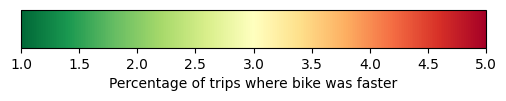

In [55]:
plot_percentage_colorbar(1,5, cmap_name='RdYlGn_r')

Is there problem with mapping: True


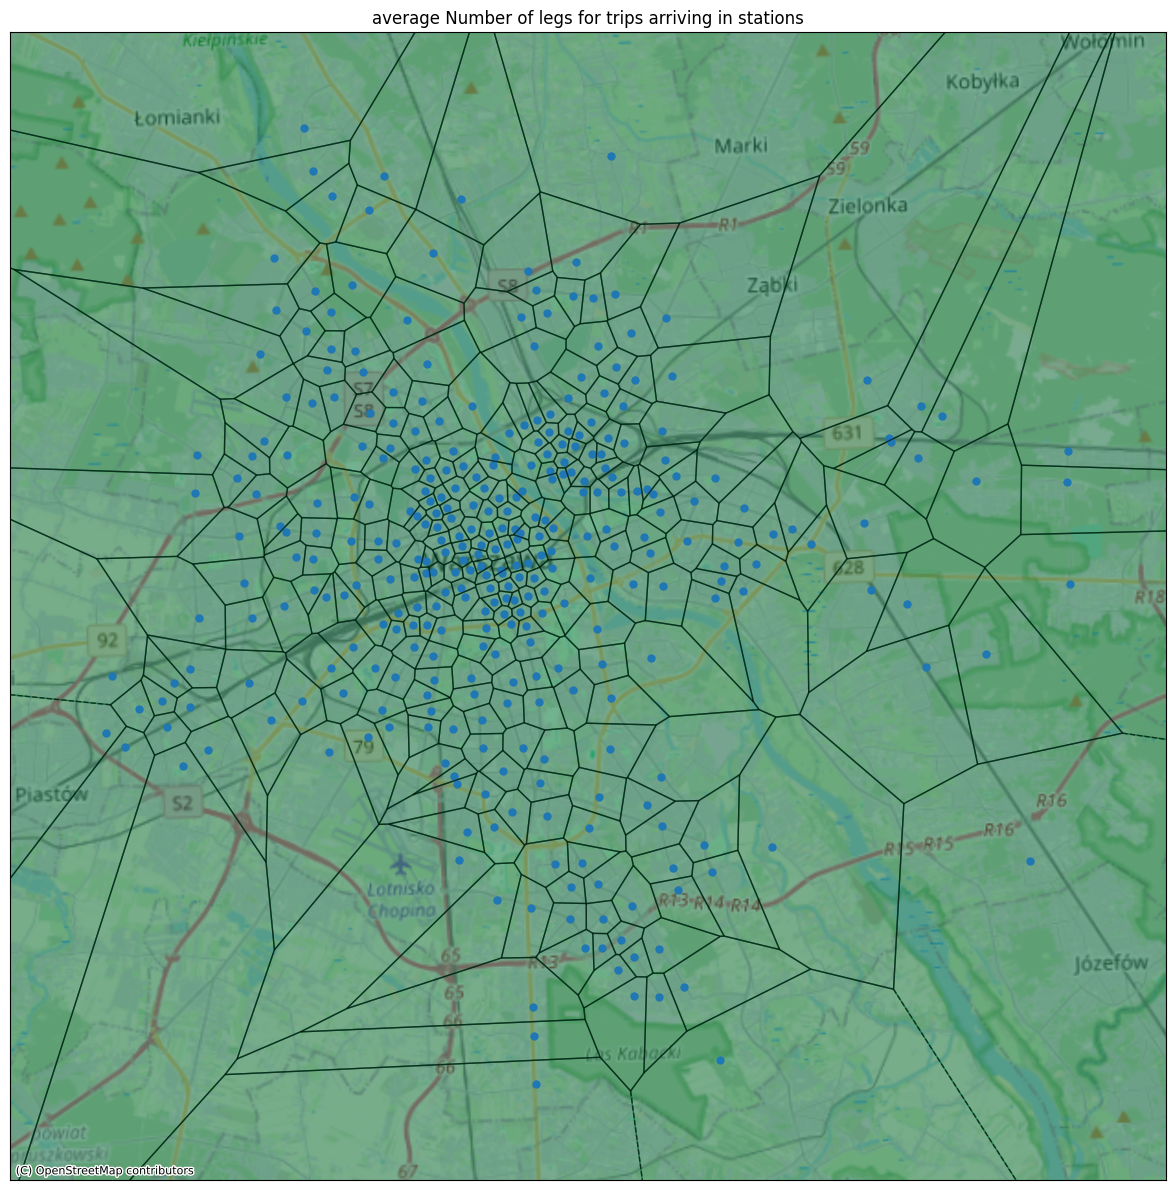

In [56]:
import voronoi_drawer as vd
from importlib import reload
reload(vd)
vd.draw_voronoi_heatmap_on_warsaw(no_outlier_stations_coords,station_colors_legs_arrival, name = "average Number of legs for trips arriving in stations", save=True,station_legend=None,zoom = 1,alpha = 0.5)